<a href="https://colab.research.google.com/github/prachigupta2006/feature-engineering/blob/main/random_sample_missing_data_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [5]:
df= pd.read_csv('train.csv',usecols=['SalePrice','GarageQual','FireplaceQu'])

In [6]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [8]:
df.shape

(1460, 3)

CREATE A NEW COLUMN

In [9]:
df['GarageQual_new']=df['GarageQual']

In [10]:
df['FireplaceQu_new']=df['FireplaceQu']

In [12]:
df.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_new,FireplaceQu_new
863,NaN,TA,132500,TA,NaN
53,Gd,TA,385000,TA,Gd
684,NaN,TA,221000,TA,NaN
267,Gd,TA,179500,TA,Gd
1315,Gd,TA,206900,TA,Gd


# FILL THE NULL VALUES WITH RANDOM DATA

In [13]:
df["GarageQual_new"][df["GarageQual_new"].isnull()] = df['GarageQual'].dropna().sample(df["GarageQual"].isnull().sum()).values

<ipython-input-13-74f7fb0a317a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GarageQual_new"][df["GarageQual_new"].isnull()] = df['GarageQual'].dropna().sample(df["GarageQual"].isnull().sum()).values


In [14]:
df["FireplaceQu_new"][df["FireplaceQu_new"].isnull()] = df['FireplaceQu'].dropna().sample(df["FireplaceQu"].isnull().sum()).values

<ipython-input-14-098c95eb48ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FireplaceQu_new"][df["FireplaceQu_new"].isnull()] = df['FireplaceQu'].dropna().sample(df["FireplaceQu"].isnull().sum()).values


In [17]:
 df['GarageQual'].dropna().sample(df['GarageQual'].isnull().sum()).values

array(['TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'Gd', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'Fa', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'Fa', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'Fa', 'Fa',
       'TA', 'TA', 'TA', 'TA'], dtype=object)

In [18]:
 df['FireplaceQu'].dropna().sample(df['FireplaceQu'].isnull().sum()).values

array(['TA', 'Gd', 'TA', 'TA', 'Fa', 'Gd', 'TA', 'Gd', 'Gd', 'Po', 'Gd',
       'Gd', 'Gd', 'TA', 'TA', 'TA', 'TA', 'Gd', 'Gd', 'Gd', 'Gd', 'TA',
       'TA', 'Gd', 'TA', 'Gd', 'TA', 'Fa', 'Gd', 'Gd', 'TA', 'Gd', 'TA',
       'TA', 'Po', 'Gd', 'TA', 'Gd', 'Gd', 'Gd', 'Gd', 'Gd', 'Gd', 'Gd',
       'TA', 'Gd', 'Gd', 'TA', 'Gd', 'Gd', 'Gd', 'Gd', 'TA', 'Fa', 'TA',
       'Gd', 'TA', 'TA', 'TA', 'Gd', 'Gd', 'Gd', 'TA', 'TA', 'TA', 'Gd',
       'TA', 'Gd', 'Gd', 'Gd', 'TA', 'Gd', 'Gd', 'TA', 'Po', 'TA', 'TA',
       'Fa', 'TA', 'TA', 'Gd', 'Gd', 'Gd', 'Gd', 'TA', 'Gd', 'Gd', 'TA',
       'Gd', 'Gd', 'Gd', 'TA', 'TA', 'Gd', 'TA', 'Gd', 'Gd', 'TA', 'TA',
       'Gd', 'Gd', 'Gd', 'Fa', 'Gd', 'Gd', 'Gd', 'TA', 'Gd', 'TA', 'Gd',
       'Gd', 'Gd', 'Gd', 'Gd', 'Gd', 'Gd', 'Gd', 'TA', 'Gd', 'Gd', 'TA',
       'TA', 'Gd', 'Gd', 'Ex', 'Gd', 'Gd', 'Fa', 'TA', 'Gd', 'TA', 'TA',
       'TA', 'TA', 'TA', 'Fa', 'TA', 'Gd', 'TA', 'TA', 'TA', 'Gd', 'TA',
       'Gd', 'Gd', 'Fa', 'Gd', 'TA', 'Gd', 'Gd', 'T

# Compare the orignal and imputed data

In [19]:
temp = pd.concat(
    [
        df['GarageQual'].value_counts() / len(df['GarageQual'].dropna()),
        df['GarageQual_new'].value_counts() / len(df['GarageQual_new'])
    ],
    axis = 1)

temp.columns=["original","imputed"]

In [20]:
temp

,original,imputed
TA,0.950689,0.951370
Fa,0.034808,0.034247
Gd,0.010152,0.010274
Ex,0.002175,0.002055
Po,0.002175,0.002055


In [29]:
temp = pd.concat(
    [
        df['FireplaceQu'].value_counts() / len(df['FireplaceQu'].dropna()),
        df['FireplaceQu_new'].value_counts() / len(df['FireplaceQu_new'])
    ],
    axis = 1)

temp.columns=["original","imputed"]

In [30]:
temp

,original,imputed
Gd,0.493506,0.496575
TA,0.406494,0.403425
Fa,0.042857,0.043151
Ex,0.031169,0.030822
Po,0.025974,0.026027


# PLOTTING:

before imputation

<ipython-input-36-1ed14e448845>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-36-1ed14e448845>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['FireplaceQu'] == category]['SalePri

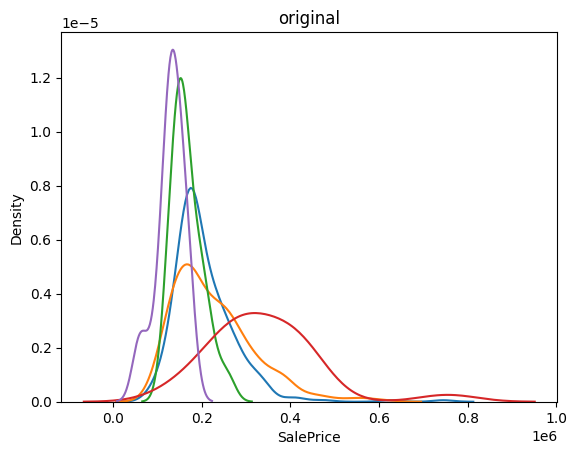

In [36]:
for category in df['FireplaceQu'].dropna().unique():
  sns.distplot(df[df['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.title("original")
plt.show()


after imputation

<ipython-input-37-a0e4181f9fb4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['FireplaceQu_new'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-37-a0e4181f9fb4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['FireplaceQu_new'] == category][

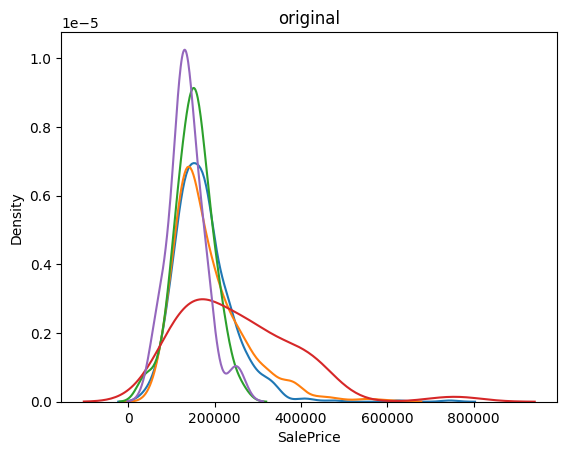

In [37]:

for category in df['FireplaceQu_new'].dropna().unique():
  sns.distplot(df[df['FireplaceQu_new'] == category]['SalePrice'],hist=False,label=category)
plt.title("original")
plt.show()